In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

In [2]:
column_name = ['wikipedia_id', 
               'freebase_id', 
               'release_date', 
               'character_name', 
               'actor_dob', 
               'actor_gender', 
               'actor_height', 
               'actor_ethnicity', 
               'actor_name', 
               'actor_age', 
               'freebase_character_map', 
               'freebase_character_id', 
               'freebase_actor_id']

In [3]:
df=pd.read_csv('character.metadata.tsv', sep='\t', names=column_name)

In [4]:
df.shape

(450669, 13)

In [5]:
df.head(10)

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
7,975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
9,975900,/m/03vyhn,2001-08-24,Uno,NaN,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy


In [6]:
num = df.isna().sum()

In [7]:
num

wikipedia_id                   0
freebase_id                    0
release_date                9995
character_name            257875
actor_dob                 106145
actor_gender               45609
actor_height              295845
actor_ethnicity           344611
actor_name                  1228
actor_age                 158113
freebase_character_map         0
freebase_character_id     257865
freebase_actor_id            815
dtype: int64

# Analyze the structural gender difference under the social graph of actors #

In [8]:
df_actor_name = df.dropna(subset = ['actor_name'])
df_actor_name.head(10)

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
7,975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
9,975900,/m/03vyhn,2001-08-24,Uno,NaN,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy


In [9]:
df_actor_name.isna().sum()

wikipedia_id                   0
freebase_id                    0
release_date                9975
character_name            256979
actor_dob                 104930
actor_gender               44393
actor_height              294617
actor_ethnicity           343383
actor_name                     0
actor_age                 156898
freebase_character_map         0
freebase_character_id     256971
freebase_actor_id              0
dtype: int64

In [10]:
# make a dict to contain the actor freebase IDs under the same movie
dict_movies = {}
for index, row in df_actor_name.iterrows():
    if row['wikipedia_id'] not in dict_movies.keys():
        dict_movies[row['wikipedia_id']] = [row['freebase_actor_id']]
    else:
        dict_movies[row['wikipedia_id']].append(row['freebase_actor_id'])

In [11]:
# delete the repeated actor freebase IDs and use the number symbol to replace in order to change it to the nodes on the graph
df_nodes = df.freebase_actor_id[df.freebase_actor_id.duplicated() == False]

dict_id = {}
df_nodes_list = list(df_nodes)
for i in range(len(df_nodes_list)):
    dict_id[df_nodes_list[i]] = i
    
df_nodes_id = df_nodes.apply(lambda x: dict_id[x]+1)
df_nodes_id[:10]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: freebase_actor_id, dtype: int64

In [12]:
# find out all partnership between actors and use the number symbol to replace in order to change it to the edges on the graph
source = []
target = []
attribute = []
for key, value in dict_movies.items():
    value_edges = list(itertools.combinations(value, 2))
    for i in range(len(value_edges)):
        source.append(dict_id[value_edges[i][0]]+1)
        target.append(dict_id[value_edges[i][1]]+1)
        attribute.append(key) 

Now we start to build up the graph with the prepared nodes and edges data. We use `nx.Graph()` to generate an empty undirected graph and load our prepared data. In our social network graph, every actor represents a node and there is a edge between two nodes if the two actors have cooperated at least one movies. The more degrees the node has, the more influential the actor is. First we will analyze the `Top100` most influential actors' gender and height difference preliminarily, and then draw out their social relationship topology. `In the next stage`, we will do some deeper analysis from the structure of social realtionship topology.

In [13]:
G = nx.Graph()
# load the nodes data
nodes_id = list(df_nodes_id)
G.add_nodes_from(nodes_id)

print(nodes_id[:10])
print(len(G.nodes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
135761


In [14]:
# load the edges data
count1 = []
count2 = 0
for i in range(len(source)):
    if source[i] > target[i]:
        c = source[i]
        source[i] = target[i]
        target[i] = c
    if source[i] == target[i]:
        count1.append(i)
        count2 += 1

In [15]:
for i in range(len(source)):
    weight = 1
    if source[i] != target[i]:
        G.add_edge(source[i], target[i])
        if 'weight' not in G.edges[source[i], target[i]].keys():
            G.edges[source[i], target[i]]['weight'] = weight
            G.edges[source[i], target[i]]['wikipedia_id'] = [attribute[i]]
        else:
            G.edges[source[i], target[i]]['weight'] += 1
            G.edges[source[i], target[i]]['wikipedia_id'].append(attribute[i])            

In [16]:
# There are also attributes of the number of cooperation and the cooperated movie IDs in the edges
G.edges[1005,1006]

{'weight': 1, 'wikipedia_id': [25947106]}

In [17]:
# Sort the actors with the degree of nodes and print the top10 
dict_degree = dict(G.degree())
result = sorted(dict_degree.items(), key = lambda x: x[1], reverse = True)
result100 = [i[0]-1 for i in result[:100]]

print('The first is the number symbol of actors and the second is its corresponding degree')
result[:10]

The first is the number symbol of actors and the second is its corresponding degree


[(5995, 1200),
 (1516, 1137),
 (3868, 1076),
 (2186, 1064),
 (3086, 1047),
 (3378, 1026),
 (723, 1016),
 (495, 1009),
 (5144, 1003),
 (6452, 974)]

In [18]:
df_actor_name_id = df_actor_name.drop_duplicates(subset=['freebase_actor_id'])
df_actor_name_id.set_index('freebase_actor_id', inplace = True)
df_actor_name_id.head()

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map,freebase_character_id
freebase_actor_id,,,,,,,,,,,,
/m/03wcfv7,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x
/m/0346l4,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4
/m/01vw26l,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_
/m/034hyc,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq
/m/01y9xg,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9


In [19]:
female = 0
female_height = []
male = 0
male_height = []
error = []
for i in result100:
    query = df_nodes_list[i]
    gender = df_actor_name_id.loc[query].actor_gender
    if gender == 'F':
        female += 1
        female_height.append(df_actor_name_id.loc[query].actor_height)
    elif gender == 'M':
        male += 1
        male_height.append(df_actor_name_id.loc[query].actor_height)
    else:
        error.append(df_actor_name_id.loc[query].actor_name)
print('The number of female and male in Top100 ranking are {} and {}'.format(female, male))
print('The number of gender missing value in Top100 result is {}'.format(len(error)))

The number of female and male in Top100 ranking are 8 and 92
The number of gender missing value in Top100 result is 0


Text(0, 0.5, 'population')

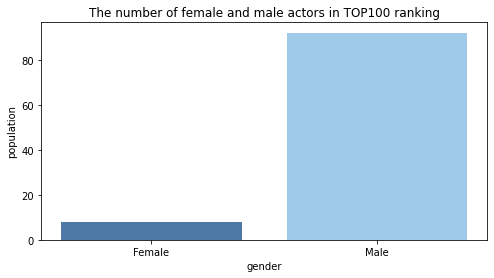

In [20]:
# plot the histogram
plt.figure(figsize = (8,4))
data = [female, male]
labels = ['Female', 'Male']
colors = ["#4E79A7",  "#A0CBE8"]
plt.bar(range(len(data)), data, tick_label = labels, color = colors)
plt.title('The number of female and male actors in TOP100 ranking')
plt.xlabel('gender')
plt.ylabel('population')

##### It is a surprise that there are only eight females in the Top100 actors, which shows that in social network of actors the male actors occupy the absolute main force. #####

In [21]:
all_male_height = []
all_female_height = []
for index, row in df_actor_name_id.iterrows():
    if row.actor_gender == 'M':
        all_male_height.append(row.actor_height)
    if row.actor_gender == 'F':
        all_female_height.append(row.actor_height) 

Because maybe there are some extreme values in actor height values, we need to correct the original data.

In [22]:
all_male_height_correct = [ i for i in all_male_height if i <= 2.5]
all_female_height_correct = [i for i in all_female_height if i <= 2.5]
male_height_correct = [i for i in male_height if i <= 2.5 ]
female_height_correct = [i for i in female_height if i <= 2.5 ]

In [23]:
male_height_average = np.nanmean(male_height_correct)
female_height_average = np.nanmean(female_height_correct)
all_male_height_average = np.nanmean(all_male_height_correct)
all_female_height_average = np.nanmean(all_female_height_correct)

print('The average height of female and male in all database are {}m and {}m'.format(all_female_height_average, all_male_height_average))
print('The average height of female and male in Top100 ranking are {}m and {}m'.format(female_height_average, male_height_average))

The average height of female and male in all database are 1.6584129269137515m and 1.8008808562428409m
The average height of female and male in Top100 ranking are 1.7075m and 1.79410989010989m


Text(0, 0.5, 'Average Meter')

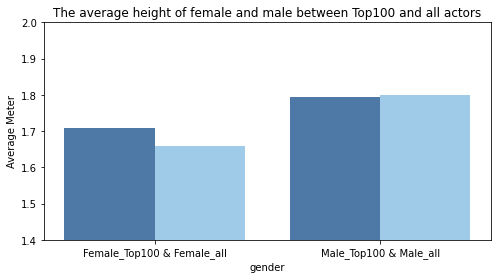

In [24]:
y1 = [female_height_average, male_height_average]
y2 = [all_female_height_average, all_male_height_average]
x = np.arange(len(y1))
width = 0.4
color1 = ["#4E79A7"]
color2 = ["#A0CBE8"]
plt.figure(figsize=(8,4))
plt.ylim(1.40, 2.00)
plt.bar(x=x, height=y1, width=width, color=color1)
plt.bar(x=x+width, height=y2, width=width, color=color2)
plt.title('The average height of female and male between Top100 and all actors')
plt.xticks(x+width/2, ['Female_Top100 & Female_all', 'Male_Top100 & Male_all'])
plt.xlabel('gender')
plt.ylabel('Average Meter')

Accroding to the above result, we find that the average height of male between Top100 and all actors seems to be very similar, so we do an additional T-test for it.

In [25]:
print(stats.ttest_ind(all_male_height_correct, male_height_correct))

Ttest_indResult(statistic=0.6400957323304295, pvalue=0.5221310969195646)


##### The p-value of T-test is `0.52`, which shows that they are different in fact. So we can find that for female actors, who are in Top100 are usualy taller, but for male actors, who are in Top100 almost the same as the average or even shorter than average. It is a fact that taller people are more likely to become an actor or appear in the movies. Furtherly we can make a conclusion that Society has broad height requirements for male actors, but it often has higher requirements for women. #####

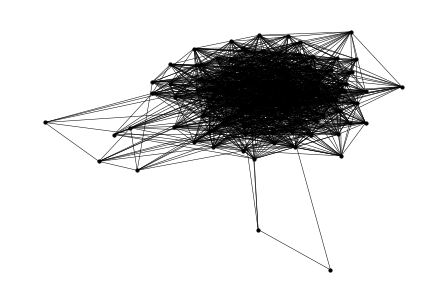

In [26]:
# create a new empty undirected graph and draw out Top100 social relationship topology
G100 = nx.Graph()
result100_new = [i[0] for i in result[:100]]

count_edges = []
for i in result100_new:
    for j in list(G.neighbors(i)):
        if j in result100_new:
            count_edges.append((i,j))
G100.add_edges_from(count_edges)

options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 0.5,
}

nx.draw(G100, **options)

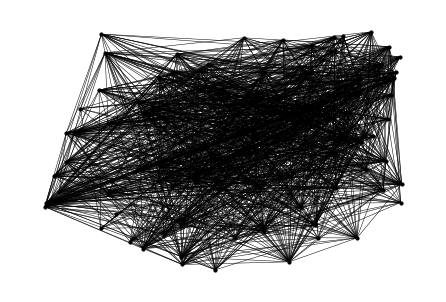

In [27]:
# draw out with random structure
nx.draw_random(G100, **options)

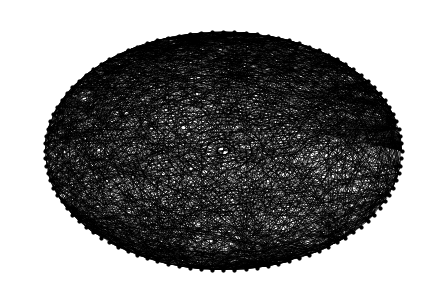

In [28]:
# draw out with circular structure
nx.draw_circular(G100, **options)

# Future directions #
- consider the attributes of edges in our graph, such as the number of cooperation.
- use the Louvian Modularity Algorithm or Girvan-Newman Algorithm to do a deeper analysis about gender difference in the social relationship topology.
- try to draw a more clear and structural graph(e.g. gephi).